In [2]:
def GINI(data_name,model_ID,score_name):
    import sys
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.interpolate
    import scipy.integrate
    from scipy.interpolate import UnivariateSpline
    
    data = pd.read_csv(data_name)
    data.drop(["Unnamed: 0"],axis=1,inplace=True)
    
    #Checking input model ID whether there exist or not in the model list
    check_model = model_ID in data["MODEL_ID"].unique()
    if(check_model == False):
        sys.exit('This model ID does not exist in Model_ID')
    
    data_sub = pd.DataFrame(data.loc[data["MODEL_ID"]==model_ID],columns=["DEF_FLAG",score_name])
    data_sub2 = pd.DataFrame(data.loc[data["MODEL_ID"]==model_ID],columns=["DEF_FLAG",score_name])
    
    #Checking bad customer whether there exist or not
    if(len(data_sub.loc[data["DEF_FLAG"]==1])==0):
        return 0
    
    data_sub.sort_values(by=[score_name],inplace=True)
    data_sub["Y"] = data_sub["DEF_FLAG"].cumsum()
    data_sub["Y_SON"] = (data_sub.Y/data_sub.Y.max())*100
    data_sub["X"] = ((data_sub.reset_index().index+1)/len(data_sub[score_name]))*100
    
    plt.plot(data_sub.X, data_sub.Y_SON)
    plt.xlabel('Cumulative Population')
    plt.ylabel('Cumulative Default Ratio')
    ident = [0, 100]
    plt.plot(ident,ident)
    
    data_sub2.sort_values(by=["DEF_FLAG"],inplace=True,ascending=False)
    data_sub2["X"] = ((data_sub2.reset_index().index+1)/len(data_sub2[score_name]))*100
    data_sub2["Y"] = data_sub2["DEF_FLAG"].cumsum()
    data_sub2["Y_SON"] = (data_sub2.Y/data_sub2.Y.max())*100
    
    #Lorenz curve
    plt.plot(data_sub2.X, data_sub2.Y_SON)
    plt.show()

    #Calculating the area between blue curve and orange curve
    spl = UnivariateSpline(data_sub.X, data_sub.Y_SON)
    AR = spl.integral(0, 100) - 5000
    
    #Calculating the area between green curve and blue curve
    spl = UnivariateSpline(data_sub2.X, data_sub2.Y_SON)
    AP = spl.integral(0, 100) - 5000
    
    return 'GINI SCORE: {}'.format(AR/AP)

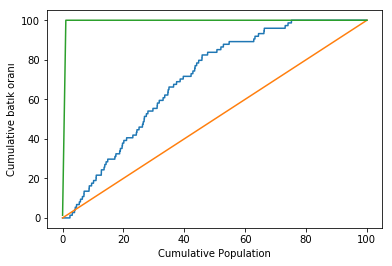

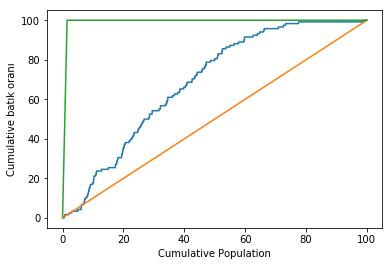

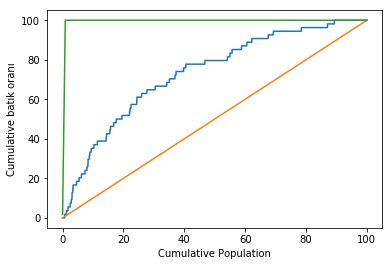

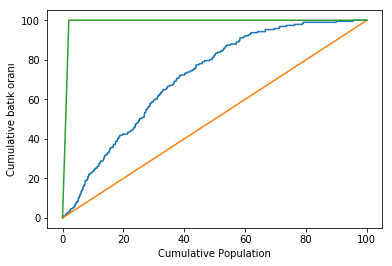

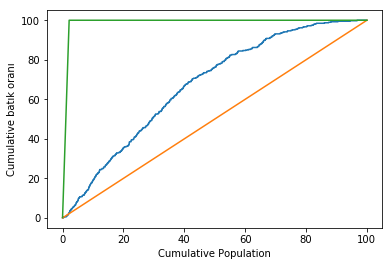

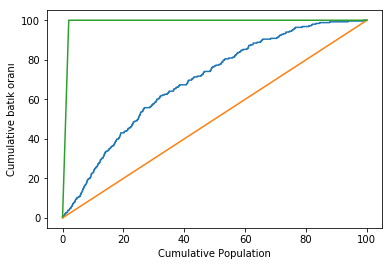

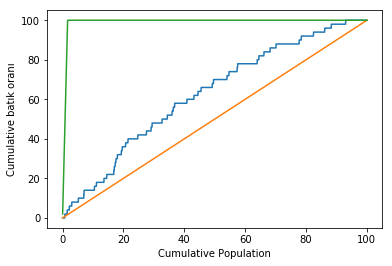

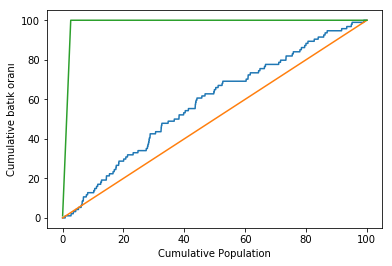

In [11]:
import numpy as np
model_list = [22, 23, 24, 25, 26, 27, 28, 32, 33]
GINI_score = []
for model_id in model_list:
    GINI_score.append(GINI('cleaned_data_monitoring.csv',model_id,"FIN_SCORE"))

In [12]:
GINI_score

[0,
 'GINI SCORE: 0.40826780528393014',
 'GINI SCORE: 0.3791163623025468',
 'GINI SCORE: 0.47032055447566684',
 'GINI SCORE: 0.4380725794191943',
 'GINI SCORE: 0.3519641906239647',
 'GINI SCORE: 0.39529979725720277',
 'GINI SCORE: 0.25776500149802845',
 'GINI SCORE: 0.1726213877803405']